In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_train = pd.read_csv("review_train.csv")
df_test = pd.read_csv("review_test.csv")
#df_test.head()

Exploratory Data Analysis (EDA)

You should conduct a thorough EDA for the given data sets. For example, check/deal with missing data, visualise the distributions of features, identify which features can better distinguish different target values, and perform feature correlation analysis. etc. Carefully present your analysis and findings in your report.

# 查看缺失值

In [2]:
print(df_train.isnull().sum())
print("")
print(df_test.isnull().sum())

REVIEW_ID              0
LABEL                  0
RATING                94
VERIFIED_PURCHASE    119
PRODUCT_CATEGORY     113
PRODUCT_ID           129
PRODUCT_TITLE         99
REVIEW_TITLE          96
REVIEW_TEXT           93
dtype: int64

REVIEW_ID            0
RATING               0
VERIFIED_PURCHASE    0
PRODUCT_CATEGORY     0
PRODUCT_ID           0
PRODUCT_TITLE        0
REVIEW_TITLE         0
REVIEW_TEXT          0
dtype: int64


In [3]:
def clean(df):
    df.dropna(inplace = True)
    df.VERIFIED_PURCHASE = df.VERIFIED_PURCHASE.map({"N":0,"Y":1})

In [4]:
clean(df_train)
clean(df_test)

# 查看correlation

In [5]:
cate_dm = pd.get_dummies(df_train[["PRODUCT_CATEGORY","LABEL","RATING","VERIFIED_PURCHASE"]],drop_first = True)
abs(cate_dm.corr()["LABEL"]).sort_values( ascending = False)
#理解一下这个correlation

LABEL                                      1.000000
VERIFIED_PURCHASE                          0.572885
PRODUCT_CATEGORY_Watches                   0.009673
PRODUCT_CATEGORY_Office Products           0.008951
PRODUCT_CATEGORY_Shoes                     0.008923
PRODUCT_CATEGORY_Furniture                 0.007560
PRODUCT_CATEGORY_Tools                     0.007009
PRODUCT_CATEGORY_Pet Products              0.006627
PRODUCT_CATEGORY_Electronics               0.006621
PRODUCT_CATEGORY_Wireless                  0.006476
PRODUCT_CATEGORY_Lawn and Garden           0.006280
PRODUCT_CATEGORY_Musical Instruments       0.006098
PRODUCT_CATEGORY_Automotive                0.005843
PRODUCT_CATEGORY_Books                     0.005215
PRODUCT_CATEGORY_Luggage                   0.005103
PRODUCT_CATEGORY_Camera                    0.004723
PRODUCT_CATEGORY_Video Games               0.004261
RATING                                     0.004217
PRODUCT_CATEGORY_Kitchen                   0.003952
PRODUCT_CATE

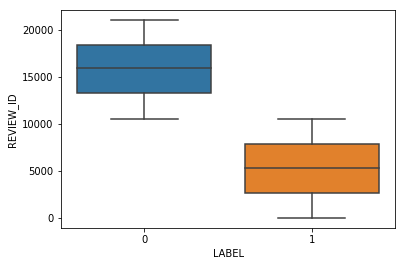

In [6]:
sns.boxplot(x="LABEL", y = "REVIEW_ID", data =df_train)
#还可以多画其他的图

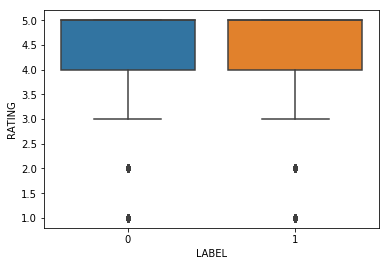

In [7]:
sns.boxplot(x="LABEL", y="RATING", data=df_train)

# feature engineering

Feature Engineering : you may consider feature engineering strategies to extract useful features for your model

In [8]:
veri_train = pd.get_dummies(df_train["VERIFIED_PURCHASE"],drop_first = True).values
veri_test = pd.get_dummies(df_test["VERIFIED_PURCHASE"],drop_first = True).values

# discriminative variables

In [9]:
#评论长度
length_tra = df_train["REVIEW_TEXT"].apply(lambda x : len(x.split())).values
length_train = np.log(length_tra)
length_te = df_test["REVIEW_TEXT"].apply(lambda x : len(x.split())).values
length_test = np.log(length_te)

(array([1.3647e+04, 2.5200e+02, 5.1000e+01, 1.1000e+01, 6.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  14. ,  297.3,  580.6,  863.9, 1147.2, 1430.5, 1713.8, 1997.1,
        2280.4, 2563.7, 2847. ]),
 <a list of 10 Patch objects>)

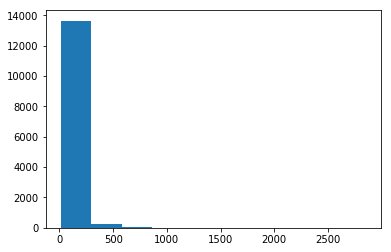

In [10]:
plt.hist(length_tra)

(array([1.705e+03, 4.433e+03, 3.969e+03, 2.145e+03, 1.032e+03, 4.360e+02,
        1.780e+02, 5.900e+01, 1.100e+01, 1.000e+00]),
 array([2.63905733, 3.17055371, 3.70205008, 4.23354646, 4.76504283,
        5.29653921, 5.82803558, 6.35953196, 6.89102834, 7.42252471,
        7.95402109]),
 <a list of 10 Patch objects>)

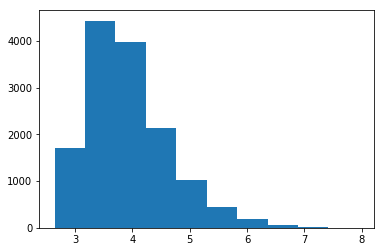

In [11]:
plt.hist(length_train)

In [12]:
#找出大写字母, 用正则表达式
import re 
#提取过程
count_cap_train =[]
#每个review_test 都提取出来
for i in df_train["REVIEW_TEXT"]:
    result_train = re.findall(r"[A-Z]", i) # 检索所有大写字母A-z, 取每一行所有的文本
    count_rev_train = len(result_train)
    count_cap_train.append(count_rev_train)# 到空的列表中[], count_cap_train =[]就包含了每一句话里面有多少个大写字母
count_train = np.log1p(count_cap_train)

In [13]:
# 同样对test 进行同样的处理
count_cap_test =[]
for i in df_test["REVIEW_TEXT"]:
    result_test = re.findall(r"[A-Z]", i)
    count_rev_test = len(result_test)
    count_cap_test.append(count_rev_test)
count_test = np.log1p(count_cap_test)

(array([1.3918e+04, 4.5000e+01, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  171.7,  343.4,  515.1,  686.8,  858.5, 1030.2, 1201.9,
        1373.6, 1545.3, 1717. ]),
 <a list of 10 Patch objects>)

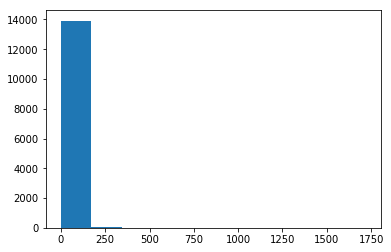

In [14]:
plt.hist(count_cap_train)

(array([7.950e+02, 3.170e+03, 5.944e+03, 2.554e+03, 1.011e+03, 3.140e+02,
        1.330e+02, 4.400e+01, 2.000e+00, 2.000e+00]),
 array([0.        , 0.74489161, 1.48978322, 2.23467483, 2.97956644,
        3.72445805, 4.46934966, 5.21424127, 5.95913288, 6.70402449,
        7.4489161 ]),
 <a list of 10 Patch objects>)

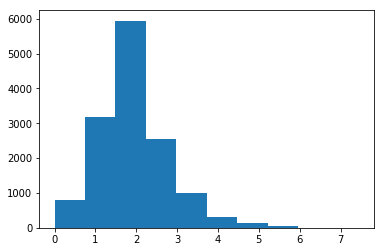

In [15]:
plt.hist(count_train)

# TFIDF

把feature 转化成数字

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus =list(df_train["REVIEW_TEXT"])

tfidf_vect = TfidfVectorizer(stop_words="english",min_df = 2,max_df=0.8,max_features=2000)
#tfidf_vect = TfidfVectorizer(max_features = 1000)
# 要再多一点,题目要求说Benchmark中你要找最简单的feature,全部都要进去不限定他的个数
train_tfidf =tfidf_vect.fit_transform(corpus)
# 为了使得test 和train 保持一致
#把fit 和transform 放一起 

In [17]:
corpus =list(df_test["REVIEW_TEXT"])
tfidf_vect_test = TfidfVectorizer(stop_words="english",min_df = 2,max_df=0.8,max_features=2000)

test_tfidf = tfidf_vect_test.fit_transform(corpus)

In [18]:
X_tfidf_train = pd.DataFrame(train_tfidf.todense(), columns= tfidf_vect.get_feature_names())
X_tfidf_train["length"]= length_train
X_tfidf_train["count"] =count_train
X_tfidf_train["verified"] =veri_train
Y_train = df_train["LABEL"]

X_tfidf_test =  pd.DataFrame(test_tfidf.todense(), columns= tfidf_vect.get_feature_names())
X_tfidf_test["length"]= length_test
X_tfidf_test["count"] =count_test
X_tfidf_test["verified"] =veri_test

(13969, 2004)

# Benchmark Model

Benchimark model:Build a logistic regression model to assess the feasibility of the project and establish a baseline model. You may choose to split the given trainning data into a training/validation set or use cross-validation to validate your model building. You need to validate your model building against whatever hyperparameters apply to the model . For this task, you can build your baseline model using simplistic text-based features. Document your analysis and findings

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_tfidf_train, Y_train,test_size=0.2,random_state=0)

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
grid_value = { 'C':[1,2,5,10,20,50,100,200,500]}
model_lr = GridSearchCV(lr, cv=5, param_grid=grid_value)
lr_cv = model_lr.fit(X_train, y_train).best_estimator_
y_pred = lr_cv.predict(X_validation)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_validation,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1415
           1       0.82      0.77      0.79      1379

   micro avg       0.80      0.80      0.80      2794
   macro avg       0.81      0.80      0.80      2794
weighted avg       0.81      0.80      0.80      2794



In [49]:
# 词干提取, 
#https://www.datacamp.com/community/tutorials/stemming-lemmatization-python
   # 把磁性不变, 换成词的原型

In [26]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [27]:
#词汇丰富度

In [28]:
def abundent( tweet ):
    return len(set(tweet)) / len(tweet)  #text3的“词汇量丰富程度”

In [57]:
df_train.index = range(len(df_train))

In [58]:
df_train

,REVIEW_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,17023,0,5.0,1,Baby,B00EZM7A34,"Bumkins Nixi Ciclo Silicone Teething Necklace,...",Great idea for Mom's with teething babies,Great idea for Mom's with teething babies. The...
1,3260,1,4.0,0,Home Entertainment,B000MXB33S,Toshiba SD-V295 Tunerless DVD VCR Combo Player,Great purchase for the price,We needed a new VCR and found this one with th...
2,3834,1,4.0,0,Musical Instruments,B00BR1IX8W,pBone PBONE2B Jiggs Mini Plastic Trombone for ...,the best trombone,my so love trombone and so i purchased this on...
3,3284,1,4.0,0,Home Entertainment,B001DZFYPW,Toshiba SD-V296 Tunerless DVD VCR Combo Player...,Works well,"I picked up one of these recently, does what i..."
4,15519,0,5.0,1,Watches,B0088BN3LG,Bulova Men's 98B169 CAMPTON Two-Tone Bracelet ...,Excellent article!,"Very elegant and sophisticated watch, I love t..."
5,16112,0,5.0,1,Health & Personal Care,B00OBFK5J6,DenadaDance Tailor’s Bunion Pads Set of 3 - So...,I was a little skeptical when I opened the pac...,I was a little skeptical when I opened the pac...
6,6811,1,5.0,0,Sports,B00D6HG6S4,Bixle 1/2-Inch Extra Thick 15 mm 72-Inch Long ...,"Hello sit-ups, it's been a while!",I am a somewhat overweight male. I got this be...
7,6392,1,5.0,1,Sports,B00QQGDPIQ,PYRUS Magnet Wireless Headphones Bluetooth V4....,Nice set of headphones. Best buy. You won't re...,"Took a little longer to arrive, but there's no..."
8,5793,1,5.0,0,Automotive,B00T6DUL2Y,**MOST HEALTHY** Car Air Purifier Ionizer with...,highly recommend!!,I have to say that this is the best car air pu...
9,11874,0,5.0,1,Shoes,B00EWIYK5C,Ray-Ban Sunglasses - RB2176 / Frame: Black Len...,Cute and stylish,"I love 4 up Ray-bans, I have 3 pairs in differ..."


In [59]:
X_tfidf_train['abundent'] = df_train.REVIEW_TEXT.apply(abundent)

In [30]:
X_tfidf_test['abundent'] = df_test.REVIEW_TEXT.apply(abundent)

# 情感分析

In [31]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/apple/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment(strings):
    sent = SentimentIntensityAnalyzer()
    return sent.polarity_scores(strings)['compound']
   


In [62]:
X_tfidf_train['sentiment'] = df_train.REVIEW_TEXT.apply(sentiment)
X_tfidf_test['sentiment'] = df_test.REVIEW_TEXT.apply(sentiment)


In [35]:
X_tfidf_train = X_tfidf_train.drop(["stemmed_text"],axis = 1)

In [64]:
X_train, X_validation, y_train, y_validation = train_test_split(X_tfidf_train, Y_train,test_size=0.2,random_state=0)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
grid_value = { 'C':[1,2,5,10,20,50,100,200,500]}
model_lr = GridSearchCV(lr, cv=5, param_grid=grid_value)
lr_cv = model_lr.fit(X_train, y_train).best_estimator_
y_pred = lr_cv.predict(X_validation)

In [66]:
print(classification_report(y_validation,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1415
           1       0.83      0.77      0.80      1379

   micro avg       0.81      0.81      0.81      2794
   macro avg       0.81      0.81      0.81      2794
weighted avg       0.81      0.81      0.81      2794

